In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.rcdefaults()

In [2]:
DATA_FOLDER = "../Data/"

imdb_basics_raw = pd.read_csv(
    DATA_FOLDER + "IMDb/title.basics.tsv.gz",
    sep="\t",
    compression="gzip",
)
imdb_ratings_raw = pd.read_csv(
    DATA_FOLDER + "IMDb/title.ratings.tsv.gz",
    sep="\t",
    compression="gzip",
)
movies_raw = pd.read_csv(DATA_FOLDER + "MovieSummaries/movie.metadata.tsv", sep="\t")

In [3]:
movies_raw.columns = [
    "wikiID",
    "fbID",
    "name",
    "releaseDate",
    "boxOffice",
    "runtime",
    "languages",
    "countries",
    "genres",
]

imdb_basics_raw.rename(
    columns={
        "primaryTitle": "name",
        "startYear": "releaseYear",
        "runtimeMinutes": "runtime",
    },
    inplace=True
)

In [4]:
movies = movies_raw.copy()
imdb_basics = imdb_basics_raw.copy()
imdb_ratings = imdb_ratings_raw.copy()

In [5]:
# Merge both imdb datasets
imdb = pd.merge(imdb_basics, imdb_ratings, on='tconst', how='left')

In [6]:
imdb["releaseYear"] = pd.to_numeric(imdb["releaseYear"], errors="coerce")

movies["releaseMonth"] = pd.to_datetime(
    movies["releaseDate"],
    errors="coerce",
).dt.month

movies["releaseYear"] = pd.to_datetime(
    movies["releaseDate"], errors="coerce", format="mixed"
).dt.year

movies.drop(columns=["releaseDate"], inplace=True)

In [7]:
movies.drop_duplicates(subset=["name", "releaseMonth", "releaseYear"], inplace=True)
imdb.drop_duplicates(subset=["name", "releaseYear"], inplace=True)

In [8]:
imdb.runtime = pd.to_numeric(imdb.runtime, errors="coerce")

In [9]:
movies_imdb = pd.merge(movies, imdb, how="left", on=["name", "releaseYear", "runtime"], suffixes=["Cmu", "Imdb"])

In [10]:
# Function to extract genres from the string representation of dictionary-like data
def parse_dict(s):
    try:
        genres_dict = eval(s.replace('null', 'None'))
        return list(genres_dict.values())
    except:
        return None


movies_imdb['languages'] = movies_imdb['languages'].apply(parse_dict)
movies_imdb['countries'] = movies_imdb['countries'].apply(parse_dict)
movies_imdb['genresCmu'] = movies_imdb['genresCmu'].apply(parse_dict)

movies_imdb['genresImdb'] = movies_imdb['genresImdb'].apply(
    lambda x: x.split(',') if not isinstance(x, float) else np.nan)

In [11]:
print(movies.shape)
print(movies_imdb.shape)
movies_imdb.head(10)

(80092, 10)
(80092, 18)


,wikiID,fbID,name,boxOffice,runtime,languages,countries,genresCmu,releaseMonth,releaseYear,tconst,titleType,originalTitle,isAdult,endYear,genresImdb,averageRating,numVotes
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German Language],[Germany],[Drama],1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13696889,/m/03cfc81,The Gangsters,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi...",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10408933,/m/02qc0j7,Alexander's Ragtime Band,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9997961,/m/06_y2j7,Contigo y aquí,NaN,NaN,[Spanish Language],[Argentina],"[Musical, Drama, Comedy]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2345652,/m/075f66,City of the Dead,NaN,76.0,[English Language],[United Kingdom],"[Horror, Supernatural]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,175026,/m/017n1p,Sarah and Son,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
characters_raw = pd.read_csv(DATA_FOLDER + "MovieSummaries/character.metadata.tsv", sep='\t')
oscars_raw = pd.read_csv(DATA_FOLDER + "Oscars/the_oscar_award.csv", sep=',')

In [13]:
characters_raw.columns = [
    "wikiID",
    "fbID",
    "releaseDate",
    "characterName",
    "DOB",
    "gender",
    "height",
    "ethnicity",
    "name",
    "ageAtMovieRelease",
    "fbCharacterMap",
    "fbCharacterID",
    "fbActorID",
]

In [14]:
oscars_raw = oscars_raw.drop(columns=["ceremony", "year_ceremony", "film"])
oscars_raw.rename(columns={"year_film": "releaseYear", "category": "oscarCategory", "winner": "oscarWinner"},
                  inplace=True)

In [15]:
characters = characters_raw.copy()
oscars = oscars_raw.copy()

In [16]:
characters["releaseYear"] = pd.to_datetime(
    characters["releaseDate"],
    errors="coerce",
    yearfirst=True,
).dt.year
characters["releaseMonth"] = pd.to_datetime(
    characters["releaseDate"],
    errors="coerce",
    yearfirst=True,
).dt.month
characters.drop(columns=["releaseDate"], inplace=True)

In [17]:
characters_oscars = pd.merge(characters, oscars, on=["name", 'releaseYear'], how="left")
print(characters_oscars.shape)
characters_oscars.head(10)

(450726, 16)


,wikiID,fbID,characterName,DOB,gender,height,ethnicity,name,ageAtMovieRelease,fbCharacterMap,fbCharacterID,fbActorID,releaseYear,releaseMonth,oscarCategory,oscarWinner
0,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,8.0,NaN,NaN
1,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,8.0,NaN,NaN
2,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,8.0,NaN,NaN
3,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,8.0,NaN,NaN
4,975900,/m/03vyhn,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0,8.0,NaN,NaN
5,975900,/m/03vyhn,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,2001.0,8.0,NaN,NaN
6,975900,/m/03vyhn,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7,2001.0,8.0,NaN,NaN
7,975900,/m/03vyhn,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0,2001.0,8.0,NaN,NaN
8,975900,/m/03vyhn,Uno,NaN,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy,2001.0,8.0,NaN,NaN
9,975900,/m/03vyhn,Dos,NaN,M,NaN,NaN,Lobo Sebastian,NaN,/m/0bgchsc,/m/0bgchsg,/m/0bgchsp,2001.0,8.0,NaN,NaN


In [18]:
budget_raw = pd.read_csv(
    DATA_FOLDER + "Budget/movies_metadata.csv.zip",
    compression="zip",
)

In [19]:
budget = budget_raw[
    [
        "budget",
        "imdb_id",
        "original_title",
        "popularity",
        "revenue",
        "vote_average",
        "vote_count",
        "release_date",
    ]
].copy()

In [20]:
budget.columns = [
    "budget",
    "tconst",
    "name",
    "popularity",
    "revenue",
    "voteAverage",
    "voteCount",
    "releaseDate",
]

In [21]:
#budget["releaseMonth"] = pd.to_datetime(budget["releaseDate"], errors="coerce").dt.month
#budget["releaseYear"] = pd.to_datetime(budget["releaseDate"], errors="coerce").dt.year
#budget.drop_duplicates(subset=["name", "releaseMonth", "releaseYear"], inplace=True)
budget.drop(columns=["releaseDate", "name", "revenue", "voteAverage", "voteCount"], inplace=True)

In [22]:
budget["budget"] = pd.to_numeric(budget["budget"], errors="coerce")

In [23]:
budget.head()

,budget,tconst,popularity
0,30000000.0,tt0114709,21.946943
1,65000000.0,tt0113497,17.015539
2,0.0,tt0113228,11.7129
3,16000000.0,tt0114885,3.859495
4,0.0,tt0113041,8.387519


In [24]:
# remove tconst nan entries to avoid issues when merging
print(budget.tconst.isnull().sum())
budget.dropna(subset=['tconst'], inplace=True)
print(budget.shape)

17
(45449, 3)


In [25]:
# remove duplicate tconst entries
print(budget.tconst.duplicated().sum())
budget.drop_duplicates(subset='tconst', inplace=True)
print(budget.shape)

32
(45417, 3)


In [26]:
# replace all zero budget entries to nan
print((budget['budget'] == 0).sum())
budget.loc[budget['budget'] == 0, 'budget'] = np.nan

36538


In [27]:
# Jennifer: trop bizarre, ca marche pas pour moi
# check tconst matches
print(budget['tconst'].isin(movies_imdb['tconst']).sum())
# check how many movies we can populate with budget data
budget.loc[budget['tconst'].isin(movies_imdb['tconst']), 'budget'].notnull().sum()

0


0

In [28]:
budget.head(10)

,budget,tconst,popularity
0,30000000.0,tt0114709,21.946943
1,65000000.0,tt0113497,17.015539
2,NaN,tt0113228,11.7129
3,16000000.0,tt0114885,3.859495
4,NaN,tt0113041,8.387519
5,60000000.0,tt0113277,17.924927
6,58000000.0,tt0114319,6.677277
7,NaN,tt0112302,2.561161
8,35000000.0,tt0114576,5.23158
9,58000000.0,tt0113189,14.686036


In [29]:
movies_imdb = pd.merge(movies_imdb, budget, on='tconst', how='left')
movies_imdb.shape

(80092, 20)

Number of movies with runtime > 400: 66
Number of movies with negative runtime: 0
Number of movies with runtime between [0, 20]: 3061
Number of na values: 20054


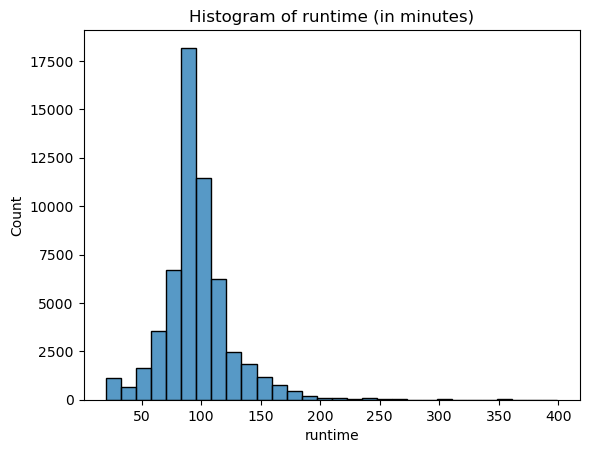

In [30]:
num_movies_gt_400 = len(movies_imdb[movies_imdb['runtime'] > 400])
num_movies_neg_runtime = len(movies_imdb[movies_imdb['runtime'] < 0])
num_movies_0_20_runtime = len(movies_imdb[(movies_imdb['runtime'] >= 0) & (movies_imdb['runtime'] <= 20)])

print(f"Number of movies with runtime > 400: {num_movies_gt_400}")
print(f"Number of movies with negative runtime: {num_movies_neg_runtime}")
print(f"Number of movies with runtime between [0, 20]: {num_movies_0_20_runtime}")

print(f"Number of na values: {movies_imdb['runtime'].isna().sum()}")

# Drop movies with runtime > 400, negative runtime and runtime between [0, 20] 
# (should we drop them or just set them to nan?)
movies_imdb = movies_imdb.drop(movies_imdb[movies_imdb['runtime'] > 400].index)
movies_imdb = movies_imdb.drop(movies_imdb[movies_imdb['runtime'] < 0].index)
movies_imdb = movies_imdb.drop(movies_imdb[(movies_imdb['runtime'] >= 0) & (movies_imdb['runtime'] <= 20)].index)

# Histogram of runtime
sns.histplot(data=movies_imdb, x="runtime", bins=30)
plt.title("Histogram of runtime (in minutes)")
plt.show()

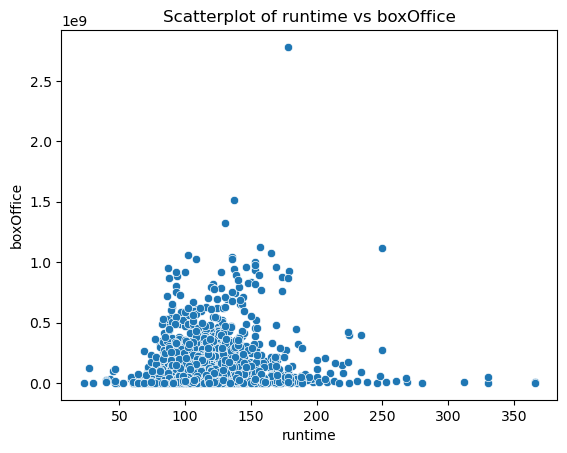

In [31]:
# Scatterplot of runtime vs boxOffice
sns.scatterplot(data=movies_imdb, x="runtime", y="boxOffice")
plt.title("Scatterplot of runtime vs boxOffice")
plt.show()

Number of movies with box office set to NaN: 68720
Proportion of movies with box office set to NaN: 0.8928733840057169


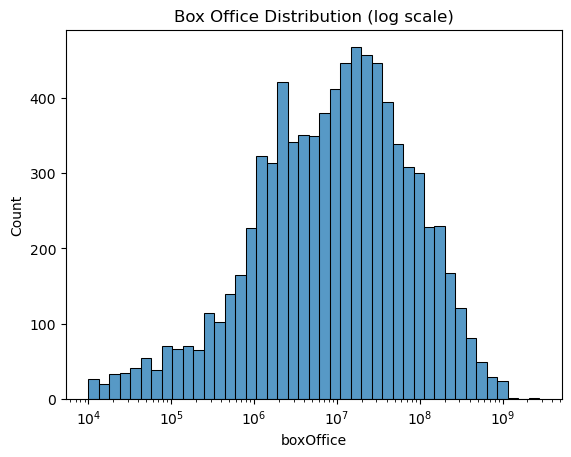

In [33]:
print(f"Number of movies with box office set to NaN: {movies_imdb['boxOffice'].isna().sum()}")
print(f"Proportion of movies with box office set to NaN: {movies_imdb['boxOffice'].isna().sum() / len(movies_imdb)}")

sns.histplot(data=movies_imdb, x="boxOffice", log_scale=True)
plt.title("Box Office Distribution (log scale)")
plt.show()

In [57]:
print(f"Number of movies with genresImdb information: {movies_imdb['genresImdb'].notnull().sum()}")
print(f"Proportion of movies with genresImdb information: {movies_imdb['genresImdb'].notnull().sum() / len(movies_imdb)}")

print(f"Number of movies with genresCmu information: {movies_imdb['genresCmu'].notnull().sum()}")
print(f"Proportion of movies with genresCmu information: {movies_imdb['genresCmu'].notnull().sum() / len(movies_imdb)}")

# Je pense pas que ca soit normal

Number of movies with genresImdb information: 1714
Proportion of movies with genresImdb information: 0.022269862924706035
Number of movies with genresCmu information: 76965
Proportion of movies with genresCmu information: 1.0


In [54]:
movies_imdb_exploded = movies_imdb.explode('genresImdb')
imdb_genre_boxoffice = movies_imdb_exploded.dropna(subset=['genresImdb']).groupby('genresImdb')['boxOffice'].agg(['mean', 'median'])
imdb_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice']

genre_counts = movies_imdb_exploded['genresImdb'].value_counts()
imdb_genre_boxoffice = imdb_genre_boxoffice.merge(genre_counts, left_index=True, right_index=True)
imdb_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice', 'num_movies']
print(imdb_genre_boxoffice)

             mean_boxoffice  median_boxoffice  num_movies
Action         1.993607e+07        19936067.0         168
Adult                   NaN               NaN           4
Adventure      1.039640e+05          103964.0          98
Animation      7.893015e+06         2607422.0         128
Biography               NaN               NaN          33
Comedy         3.485767e+07        35633255.0         272
Crime          4.335557e+07        36375000.0         101
Documentary    2.500000e+06         2500000.0          95
Drama          2.964369e+07         7545599.5         562
Family                  NaN               NaN         107
Fantasy        3.475721e+07        34757214.0          60
Game-Show               NaN               NaN           2
History                 NaN               NaN          33
Horror         1.059838e+07        10598377.5         124
Music                   NaN               NaN          19
Musical        1.542700e+08       154270000.0          19
Mystery       

In [58]:
movies_imdb_exploded = movies_imdb.explode('genresCmu')
cmu_genre_boxoffice = movies_imdb_exploded.dropna(subset=['genresCmu']).groupby('genresCmu')['boxOffice'].agg(['mean', 'median'])
cmu_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice']

genre_counts = movies_imdb_exploded['genresCmu'].value_counts()
cmu_genre_boxoffice = cmu_genre_boxoffice.merge(genre_counts, left_index=True, right_index=True)
cmu_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice', 'num_movies']
print(cmu_genre_boxoffice)

                  mean_boxoffice  median_boxoffice  num_movies
Absurdism           7.571945e+07        29106786.0          91
Acid western        6.412655e+05          641265.5           8
Action              8.874582e+07        24093031.5        8575
Action Comedy       8.380756e+07        38576276.5         167
Action Thrillers    1.092085e+08        44350926.0         509
...                          ...               ...         ...
World History       2.796540e+05          311542.0          19
World cinema        1.792152e+07         6227252.0        6943
Wuxia               9.761668e+07       100000000.0         124
Z movie                      NaN               NaN           3
Zombie Film         4.699163e+07        14210186.0         266

[363 rows x 3 columns]
